In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from loguru import logger
import warnings
import re

warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
datafile = (Path("..") / Path(config["processed"]) / config["current"]).resolve()
if not datafile.exists():
    logger.warning(
        "Datafile does not exist. First run src/preprocess.py, and check the timestamp!"
    )
df = pd.read_parquet(datafile)
# df.head()
# df.info()

In [51]:
# --- Step 1: Define keywords ---
keywords = ["camera", "lift", "geluid", "schoon", "deur"]

# --- Step 2: Build regex pattern ---
pattern = r"\b(" + "|".join(keywords) + r")\b"

In [52]:
# --- Step 3: Extract matching keyword into new column ---
df["keyword_match"] = df["message"].str.extract(
    pattern, flags=re.IGNORECASE, expand=False
)

df

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,msg_length,keyword_match
0,2023-02-01 19:59:48+00:00,"Dank voor bericht, Marijke",kooky-tapir,False,False,26,False,evening,19:59:48,2,26,NaN
1,2023-02-01 20:46:43+00:00,"Herman goede avond, Mag ik de telefoon nummer...",dynamic-frog,False,False,87,False,evening,20:46:43,2,87,NaN
2,2023-02-01 20:52:10+00:00,Voor Ista metertje: 010 2455700,intense-toad,False,True,31,False,evening,20:52:10,2,31,NaN
3,2023-02-01 20:52:45+00:00,"Dit gaat dus via Ista, niet via De Combi",intense-toad,False,True,40,False,evening,20:52:45,2,40,NaN
4,2023-02-01 20:55:55+00:00,Bedankt Herman 👍🏽🙏🏽,dynamic-frog,True,False,19,False,evening,20:55:55,2,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4560,2025-09-09 08:39:49+00:00,Het zijn geen kleine kuikentjes meer!!🦢🐣🥰,dazzling-yak,True,False,41,False,worktimes,08:39:49,1,41,NaN
4561,2025-09-09 08:41:03+00:00,😍,flexible-platypus,True,True,1,False,worktimes,08:41:03,1,1,NaN
4562,2025-09-09 08:54:40+00:00,👍,nimble-raven,True,False,1,False,worktimes,08:54:40,1,1,NaN
4563,2025-09-09 12:34:38+00:00,Morgen gedurende de dag zijn er mensen op het ...,intense-toad,False,True,300,False,worktimes,12:34:38,1,300,NaN


In [53]:
# Drop rows without matches
df_filtered = df.dropna(subset=["keyword_match"])
df_filtered.count()
df_filtered

,timestamp,message,author,has_emoji,is_topk,message_length,has_link,timestamp_category,hour,day_of_week,msg_length,keyword_match
52,2023-03-01 10:20:14+00:00,"De sleutels van 203 zaten nog in de deur, op t...",peppy-badger,False,False,66,False,worktimes,10:20:14,2,66,deur
96,2023-03-25 13:37:50+00:00,Bij naar buiten gaan heb ik de bezorger binnen...,mind-blowing-kudu,False,False,124,False,worktimes,13:37:50,5,124,deur
97,2023-03-25 13:41:25+00:00,Heeft bij mij aangebeld 224 en staat nu bij mi...,rollicking-ostrich,False,False,61,False,worktimes,13:41:25,5,61,deur
143,2023-04-08 13:31:22+00:00,Iemand zijn vuilniszak vol met vliegen losgela...,silky-lapwing,False,True,60,False,worktimes,13:31:22,5,60,lift
249,2023-05-21 10:00:46+00:00,Beneden of lift briefje ophangen?,sudsy-jellyfish,False,True,33,False,worktimes,10:00:46,6,33,lift
...,...,...,...,...,...,...,...,...,...,...,...,...
4422,2025-08-08 14:25:37+00:00,PROCEDURE CAMERATOEZICHT (VERSIE 250610) 1. Do...,vivid-rhinoceros,False,True,3117,False,worktimes,14:25:37,4,3117,camera
4488,2025-08-21 17:40:38+00:00,De advocaat van de eigenaren appartement 202 h...,vivid-rhinoceros,False,True,196,False,evening,17:40:38,3,196,geluid
4494,2025-08-27 10:08:50+00:00,In de zaak laag frequentie geluid/nr202 zien d...,intense-toad,False,True,215,False,worktimes,10:08:50,2,215,geluid
4539,2025-09-02 21:38:06+00:00,Is belangrijk dat er controle word gedaan als ...,zany-trout,False,True,179,False,evening,21:38:06,1,179,deur


In [54]:
# Normalize to lowercase so categories are consistent
df_filtered["keyword_match"] = df_filtered["keyword_match"].str.lower()

/var/folders/hv/m4f2vdm11q911kmp31zcg4t40000gn/T/ipykernel_91487/1946089694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["keyword_match"] = df_filtered["keyword_match"].str.lower()


# Violin plot → shows the distribution shape.
# Swarm plot → shows individual data points and their distribution.
This combo helps spot both overall patterns and outliers.

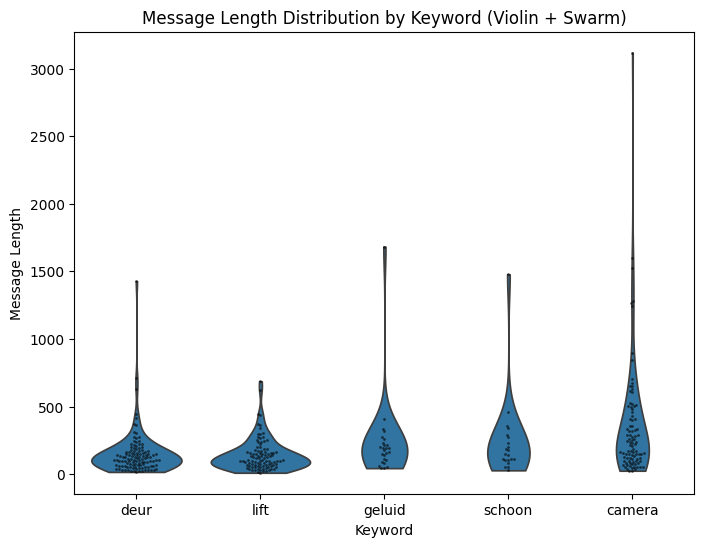

In [55]:
# --- Step 4: Plot violin + swarm ---
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_filtered,
    x="keyword_match",
    y="message_length",
    inner=None,   # hide inner box since we’ll overlay swarm
    cut=0
)

# Overlay swarm (dots)
sns.swarmplot(
    data=df_filtered,
    x="keyword_match",
    y="message_length",
    color="k",    # black dots
    size=2,       # dot size
    alpha=0.6     # transparency
)

plt.title("Message Length Distribution by Keyword (Violin + Swarm)")
plt.xlabel("Keyword")
plt.ylabel("Message Length")
plt.show()

In [56]:
# # --- Step 4: Plot violin distribution ---
# plt.figure(figsize=(8, 6))
# sns.violinplot(
#     data=df_filtered,
#     x="keyword_match",
#     y="message_length",
#     inner="box",   # adds a boxplot inside
#     cut=0
# )
# plt.title("Violin Plot of Message Length by Keyword Mention")
# plt.xlabel("Keyword")
# plt.ylabel("Message Length")
# plt.show()